## Build and Deploy a Natural Language Processing (NLP) Model to classify Sentiments about Amazon's Prime Videos 

+ **Group:** Group 1
+ **Student pace:** DSPT08
+ **Scheduled project review date/time:** 31/03/2025 23.59 Hours
+ **Instructor name:** Samuel Karu

## Project Summary

### Data Understanding

-
-
-
-


### Problem Statement
-
-
-
-


### Business Objectives
-
-
-
-

## Requirements to Meet Objectives

### 1. Load the Data
Use Pandas to load the dataset and get a sense of what is in the dataset by visually inspecting the data.

### 2. Perform Data Cleaning with nltk 
- Use Regular Expressions (REGEX) to remove irrelevant information such as punctuations and numbers
- Convert all text to lowercase to ensure uniformity
- Apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- Remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). This helped in focusing on more meaningful words in the text, leading to better performance of NLP models.
- Tokenize the cleaned text

### 3. Perform Exploratory Data Analysis
  - Analyze the positive and negative sentiments by company.
 - Analyze the distribution of sentiment labels (positive, negative,neutral) using bar charts and value counts to understand class balance.
 - Visualize the top 10 most common words in the data set.
 - Created word clouds for positive, negative and neutral tweets to visualize most common words in each sentiment class
 
### 4. Vectorize the text data with TFidfVectorizer
- All data must be in numeric form in order to fit a scikit-learn model. We will use Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer from sklearn.feature_extraction.text to convert the text data into a vectorized format.Using TF-IDF is important because it effectively weighs the significance of words in a document relative to the entire dataset, helping to distinguish relevant terms from common ones.

 ### 5. Iteratively Build and Evaluate Baseline and Advanced  Models
- Using Pipelines, build and iteratively tune baseline SVM and Multinomial Naive Bayes Models 
- Build and Train one or more Advanced  models and compare the results with those of the tuned baseline models

 
 ### 6. Evaluation 
Evaluate model performance using the following metrics:

- Classification_report from Scikit-learn : This metric provides a convenient way to generate detailed performance metrics for classification tasks. It provides a summary of key metrics for each class, including accuracy, precision, recall, and F1-score
- confusion_matrix: It provides a visual summary of the prediction results by showing the count of true positives, true negatives, false positives, and false negatives.

### 7. Deploy the Model
-
-

### 8. Next Steps
Using the results obtained from the evaluation process make recommendations on:-

### 1.1 Load and Clean the Dataset

In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data as a DataFrame and display the first 5 columns
video_df = pd.read_csv("prime_videos.csv", encoding='ISO-8859-1')
video_df.head(5)

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",B013488XFS,B013488XFS,2015-08-24 03:07:17.000,True,Prime Video,Sneaky Pete,4.6,56658.0,['A\xa0con man (Giovanni Ribisi) on the run fr...,NaN,Suspense
1,5,Five Stars,My Kiddos LOVE this show!!,B00CB6VTDS,B00CB6VTDS,2016-04-19 21:16:50.000,True,Prime Video,Creative Galaxy,4.8,6403.0,['Follow the adventures of Arty and his sideki...,NaN,Kids
2,5,What Love Is...,"...isn't always how you expect it to be, but w...",B001H1SVZC,B001H1SVZC,2020-05-28 04:13:47.074,True,Prime Video,NaN,4.5,389.0,NaN,NaN,NaN
3,5,QUIRKY TURNS TO HEARTSTRINGS,As you learn about the very unique characters ...,B06WVW16WY,B06WVW16WY,2020-04-16 01:15:47.540,True,Prime Video,NaN,4.8,1966.0,NaN,NaN,NaN
4,5,Way better than the harsh reviews.,Our family loved the film. We have kids and th...,B07RXM26FG,B07RXM26FG,2019-09-29 05:17:12.700,True,Prime Video,NaN,4.5,57962.0,NaN,NaN,NaN


In [3]:
# check the shape of the data
video_df.shape
print(f"This data set consists of {video_df.shape[0]} rows")
print(f"This data set consists of {video_df.shape[1]} columns")

This data set consists of 233610 rows
This data set consists of 14 columns


In [4]:
# Get column names
video_df.columns

Index(['rating', 'title_x', 'text', 'asin', 'parent_asin', 'timestamp',
       'verified_purchase', 'main_category', 'title_y', 'average_rating',
       'rating_number', 'description', 'price', 'categories'],
      dtype='object')

In [5]:
# Rename and dropsome columns

video_df = video_df.rename(columns={'text':'review_text','title_x':'rating_desc', 'title_y':'movie_title'})
video_df = video_df.drop(columns=['asin','parent_asin','rating_number','main_category'])
print(video_df.columns)

Index(['rating', 'rating_desc', 'review_text', 'timestamp',
       'verified_purchase', 'movie_title', 'average_rating', 'description',
       'price', 'categories'],
      dtype='object')


columns have been renamed, and columns that are not necessary for analysis have been dropped

In [6]:
# Get column attributes
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233610 entries, 0 to 233609
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             233610 non-null  int64  
 1   rating_desc        233586 non-null  object 
 2   review_text        233579 non-null  object 
 3   timestamp          233610 non-null  object 
 4   verified_purchase  233610 non-null  bool   
 5   movie_title        33800 non-null   object 
 6   average_rating     233607 non-null  float64
 7   description        33800 non-null   object 
 8   price              24165 non-null   float64
 9   categories         33800 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 16.3+ MB


The data types are appropriate for the columns.However, there aresignificant NULL values in the movie_title,description,price and categories columns. Since one of our objectives is to analyze sentiment by genre, we need the categories column not to be null. We will drop all the rows in the categories columns with NULL values.

In [7]:
# replave NaN in the 'price' column with the mean
# drop all rows with NaN values in the 'categories','description' and 'movie_title' columns

video_df['price'].fillna(video_df['price'].mean(),inplace=True)

video_df = video_df.dropna(subset=['categories','description','movie_title'])
video_df.info()
print("video_df.shape:", video_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 33800 entries, 0 to 233601
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             33800 non-null  int64  
 1   rating_desc        33798 non-null  object 
 2   review_text        33798 non-null  object 
 3   timestamp          33800 non-null  object 
 4   verified_purchase  33800 non-null  bool   
 5   movie_title        33800 non-null  object 
 6   average_rating     33799 non-null  float64
 7   description        33800 non-null  object 
 8   price              33800 non-null  float64
 9   categories         33800 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 2.6+ MB
video_df.shape: (33800, 10)


The NULL values from the specified columnsand the NaN in the 'price' column have been updated with the average price. However, there are still a few lingering NaN values, which will be dropped in the cell below

In [8]:
video_df = video_df.dropna()
video_df.info()

print("video_df.shape:", video_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 33796 entries, 0 to 233601
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             33796 non-null  int64  
 1   rating_desc        33796 non-null  object 
 2   review_text        33796 non-null  object 
 3   timestamp          33796 non-null  object 
 4   verified_purchase  33796 non-null  bool   
 5   movie_title        33796 non-null  object 
 6   average_rating     33796 non-null  float64
 7   description        33796 non-null  object 
 8   price              33796 non-null  float64
 9   categories         33796 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 2.6+ MB
video_df.shape: (33796, 10)


All the NaN values have been dropped.

In [9]:
# Remove rows where 'categories' contain '['
video_df = video_df[~video_df['categories'].str.contains('[', regex=False)]
video_df['categories'].value_counts()

categories
Suspense                     7518
Comedy                       7507
Drama                        7075
Science Fiction              3945
Documentary                  1604
Fantasy                       802
Action                        783
Unscripted                    753
Historical                    567
Kids                          474
Animation                     411
Horror                        379
Adventure                     325
Special Interest              322
International                 218
Young Adult Audience          203
Romance                       141
Western                       132
Sports                         96
Arts                           86
Faith and Spirituality         64
LGBTQ                          54
Music Videos and Concerts      40
Military and War               38
Arthouse                       31
Fitness                        30
Anime                          20
Talk Show and Variety           7
Name: count, dtype: int64

In [10]:
#Change 'timestamp' data type to datetime

video_df['timestamp'] = pd.to_datetime(video_df['timestamp'])
video_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33625 entries, 0 to 233601
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             33625 non-null  int64         
 1   rating_desc        33625 non-null  object        
 2   review_text        33625 non-null  object        
 3   timestamp          33625 non-null  datetime64[ns]
 4   verified_purchase  33625 non-null  bool          
 5   movie_title        33625 non-null  object        
 6   average_rating     33625 non-null  float64       
 7   description        33625 non-null  object        
 8   price              33625 non-null  float64       
 9   categories         33625 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.6+ MB


'timestamp'column is now in a datetime64 format suitable for time series analysis.

In [11]:
# Using the 'average_rating'column,create a new sentiment column;if rating is between 4 or 5: 'Positive' ; if rating is  3:
# 'Neutral',and if rating is 1 or 2 'Negative'

# Create 'sentiments' column
def classify_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

video_df['sentiment'] = video_df['rating'].apply(classify_sentiment)

video_df['sentiment'].value_counts()

sentiment
positive    25149
negative     4928
neutral      3548
Name: count, dtype: int64

The sentiments are largely Positive with a fewer neutral and negative sentiments. It would be of interest to Amazon and other content creators to determine which titles and genres have neutral or negative sentiments

In [12]:
video_df['verified_purchase'].value_counts()

verified_purchase
True     27047
False     6578
Name: count, dtype: int64

There appears to be rows where the verifiied purchase is false, meaning the purchase was not verified. We will drop all those rows.


In [13]:
# Drop rows where verified_purchase  is false

video_df = video_df.drop(video_df[video_df['verified_purchase']==False].index)
video_df.shape

(27047, 11)

New shape indicates that the unverified purchases have been dropped

In [14]:
video_df.describe()

,rating,timestamp,average_rating,price
count,27047.000000,27047,27047.000000,27047.000000
mean,4.113099,2017-09-06 10:40:28.803795968,4.430654,14.327031
min,1.000000,2007-08-17 05:48:51,1.000000,0.000000
25%,4.000000,2016-01-23 21:29:58.500000,4.300000,10.790000
50%,5.000000,2016-12-30 01:32:38,4.600000,14.570061
75%,5.000000,2019-08-06 15:05:13.583500032,4.700000,14.990000
max,5.000000,2023-03-17 20:13:30.343000,5.000000,81.990000
std,1.266188,NaN,0.434547,5.662929


'rating' and 'average_rating' both show a bias towards high values, indicating most content receive favorable evaluations. The time stamp indicates we have data from 2007 to 2023 - a period of over 5 years. WE can therefore analyze sentiments over time.

'price' shows a concentration around mid-range values (~14.5), with outliers suggesting a few premium-priced items. The minimum price of 0 is not surprising as Amazom Prime offers a selection of movies and TV shows that are free to watch with a Prime Membership.Additionally, Amazon also has some free content available with ads, which doesn't require a Prime membership.

In [15]:
# Make a copy of the cleaned data set before text pre-processing and EDA
video_df_copy = video_df.copy(deep=True)
video_df_copy.head(20)

,rating,rating_desc,review_text,timestamp,verified_purchase,movie_title,average_rating,description,price,categories,sentiment
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",2015-08-24 03:07:17.000,True,Sneaky Pete,4.6,['A\xa0con man (Giovanni Ribisi) on the run fr...,14.570061,Suspense,positive
1,5,Five Stars,My Kiddos LOVE this show!!,2016-04-19 21:16:50.000,True,Creative Galaxy,4.8,['Follow the adventures of Arty and his sideki...,14.570061,Kids,positive
14,4,Four Stars,It was pretty good. Had some pretty comical sc...,2016-09-16 18:39:49.000,True,Seven Girlfriends,3.2,"[""Jesse has never had a problem finding a gir...",12.990000,Comedy,positive
19,3,Ok love story,A bit slow and an unsatisfying ending,2016-11-08 22:14:17.000,True,Still Mine,4.6,"[""James Cromwell gives a tour de force perform...",9.990000,Drama,neutral
21,1,TRASH,A movie based solely on INCEST. Storyline is g...,2022-08-22 20:06:25.847,True,How I Live Now,4.3,"['Set in the near-future UK, Saoirse Ronan pla...",12.990000,International,negative
27,5,Five Stars,Excellent!!!,2016-01-25 18:47:06.000,True,The Martian,4.8,"['From legendary director Ridley Scott (Alien,...",4.990000,Science Fiction,positive
29,5,Thought Provocking,"I loved this video, it had many answers to som...",2013-02-19 11:05:17.000,True,Watchers 4,4.4,"[""L.A. Marzulli continues with Dr. Leir's late...",14.570061,Science Fiction,positive
32,5,Great New Show!,"What a great show! Perfect, nice, show for you...",2016-02-16 21:00:12.000,True,The Kicks,4.8,['Devin Burke and her family have moved cross-...,14.570061,Comedy,positive
37,1,Eh. Waste of time,I cannot stand when movies are remade and they...,2023-01-26 01:33:30.737,True,Father of the Bride,4.3,"['You are invited to the love, the food, the m...",14.570061,Comedy,negative
43,2,Pretty bad acting,I wanted to like this movie but the acting was...,2020-10-06 00:44:30.933,True,A Husband For Christmas,4.0,['Two co-workers agree to a loveless marriage ...,14.570061,Comedy,negative


### 1.2 Text Tranformations

In this section, we will prepare the video_df for EDA and Modeling. 
- Join the text in rating_desc and review_text into a new column called reviews
- We will start by dropping columns that have no analytical values like description,verified_purchase. 
- Then we will prepare the review_text feature column for vectorization,This will involve:-
  - removing unnessary text and symbols numbers, punctuation and symbols that carry no meaning to the sentiments.
  - convert all text to lowercase to ensure uniformity
  - apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
  - remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.).
  - tokenize the cleaned text into individual words

In [16]:
# Join the text in 'rating_desc' and 'review_text' into a new column called 'reviews'
video_df['reviews'] = video_df['rating_desc'] + '  ' + video_df['review_text']
video_df.head()



,rating,rating_desc,review_text,timestamp,verified_purchase,movie_title,average_rating,description,price,categories,sentiment,reviews
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",2015-08-24 03:07:17.000,True,Sneaky Pete,4.6,['A\xa0con man (Giovanni Ribisi) on the run fr...,14.570061,Suspense,positive,"Five Stars Amazon, please buy the show! I'm h..."
1,5,Five Stars,My Kiddos LOVE this show!!,2016-04-19 21:16:50.000,True,Creative Galaxy,4.8,['Follow the adventures of Arty and his sideki...,14.570061,Kids,positive,Five Stars My Kiddos LOVE this show!!
14,4,Four Stars,It was pretty good. Had some pretty comical sc...,2016-09-16 18:39:49.000,True,Seven Girlfriends,3.2,"[""Jesse has never had a problem finding a gir...",12.990000,Comedy,positive,Four Stars It was pretty good. Had some prett...
19,3,Ok love story,A bit slow and an unsatisfying ending,2016-11-08 22:14:17.000,True,Still Mine,4.6,"[""James Cromwell gives a tour de force perform...",9.990000,Drama,neutral,Ok love story A bit slow and an unsatisfying ...
21,1,TRASH,A movie based solely on INCEST. Storyline is g...,2022-08-22 20:06:25.847,True,How I Live Now,4.3,"['Set in the near-future UK, Saoirse Ronan pla...",12.990000,International,negative,TRASH A movie based solely on INCEST. Storyli...


The 2 columns have been joined into one column. This will ensire we get the full context of the reviewer's sentiment

In [17]:
# Drop columns that have no anlytical and modeling use

video_df = video_df.drop(columns=['verified_purchase','description','rating_desc','average_rating','review_text'])

video_df.columns

Index(['rating', 'timestamp', 'movie_title', 'price', 'categories',
       'sentiment', 'reviews'],
      dtype='object')

In [18]:
# Reorder columns
columns_order = ['rating', 'timestamp', 'movie_title', 'price',
       'categories','reviews','sentiment']
video_df = video_df[columns_order]
print(video_df.columns)
print(video_df.head())

Index(['rating', 'timestamp', 'movie_title', 'price', 'categories', 'reviews',
       'sentiment'],
      dtype='object')
    rating               timestamp        movie_title      price  \
0        5 2015-08-24 03:07:17.000        Sneaky Pete  14.570061   
1        5 2016-04-19 21:16:50.000    Creative Galaxy  14.570061   
14       4 2016-09-16 18:39:49.000  Seven Girlfriends  12.990000   
19       3 2016-11-08 22:14:17.000         Still Mine   9.990000   
21       1 2022-08-22 20:06:25.847     How I Live Now  12.990000   

       categories                                            reviews sentiment  
0        Suspense  Five Stars  Amazon, please buy the show! I'm h...  positive  
1            Kids             Five Stars  My Kiddos LOVE this show!!  positive  
14         Comedy  Four Stars  It was pretty good. Had some prett...  positive  
19          Drama  Ok love story  A bit slow and an unsatisfying ...   neutral  
21  International  TRASH  A movie based solely on INCEST. Storyl

Columns are reordered and will proceed to tokenize the reviews column

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the preprocessing function to the 'reviews' column and overwrite it
video_df['reviews'] = video_df['reviews'].apply(preprocess_text)

# verify the changes

video_df['reviews'].head()

0            five star amazon please buy show im hooked
1                            five star kiddos love show
14    four star wa pretty good pretty comical scene ...
19           ok love story bit slow unsatisfying ending
21    trash movie based solely incest storyline garb...
Name: reviews, dtype: object

The 'reviews' column has now been transformed into lowercase strings without numbers and symbols. The next step is to tokenize the cleaned text. Tokenization is the process of converting the tweets into individual words. 

In [20]:
from nltk.tokenize import word_tokenize

# Define a function for tokenization
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Create a new column for the tokenized text
video_df['reviews_tokenized'] = video_df['reviews'].apply(tokenize_text)

# Display the first 5 rows 
print("Tokenized Reviews - First 5 Rows:")
print(video_df['reviews_tokenized'].head())


Tokenized Reviews - First 5 Rows:
0     [five, star, amazon, please, buy, show, im, ho...
1                      [five, star, kiddos, love, show]
14    [four, star, wa, pretty, good, pretty, comical...
19    [ok, love, story, bit, slow, unsatisfying, end...
21    [trash, movie, based, solely, incest, storylin...
Name: reviews_tokenized, dtype: object


The reviews have been tokenized and we can now use these words to perform various EDA tasks.

In [21]:
print(video_df.head())

    rating               timestamp        movie_title      price  \
0        5 2015-08-24 03:07:17.000        Sneaky Pete  14.570061   
1        5 2016-04-19 21:16:50.000    Creative Galaxy  14.570061   
14       4 2016-09-16 18:39:49.000  Seven Girlfriends  12.990000   
19       3 2016-11-08 22:14:17.000         Still Mine   9.990000   
21       1 2022-08-22 20:06:25.847     How I Live Now  12.990000   

       categories                                            reviews  \
0        Suspense         five star amazon please buy show im hooked   
1            Kids                         five star kiddos love show   
14         Comedy  four star wa pretty good pretty comical scene ...   
19          Drama         ok love story bit slow unsatisfying ending   
21  International  trash movie based solely incest storyline garb...   

   sentiment                                  reviews_tokenized  
0   positive  [five, star, amazon, please, buy, show, im, ho...  
1   positive              

The reviews have been tokenized and we are now ready to perform EDA!

### 2.1 Exploratory Data Analysis
In this section we will:

- **Sentiment Distribution:** Use bar charts and value counts to understand the class balance of sentiment labels (positive, negative, neutral). This helps identify any class imbalances.
- **Length Analysis:** Visualize the ditribution of review lengths (word counts) across sentiment classes. This helps identify whether positive,neutral or negative review have more (or fewer) words

- **Trend Analysis:** Show trends in sentiment distribution over time using the timestamp column.Helps identify whether positive, negative, or neutral sentiments dominate during certain timeframes.
- **Sentiment Bivariate Relationships:** Visulize the distribution of sentiments across different categories (genres),and also price (paid or free).Highlights which genres and  paid/not paid(priced zero) for content are more likely to have positive, negative, or neutral reviews.

- **Visualize Top Common Words:** Identify and display the top 10 most common words in the dataset. This gives an overview of the predominant terms.

- **Create Word Clouds:** Generate word clouds for positive, negative, and neutral tweets to visualize the most common words in each sentiment class. This provides a visual representation of word frequency and sentiment-specific terms.


#### 2.1.1 Sentiment Distribution

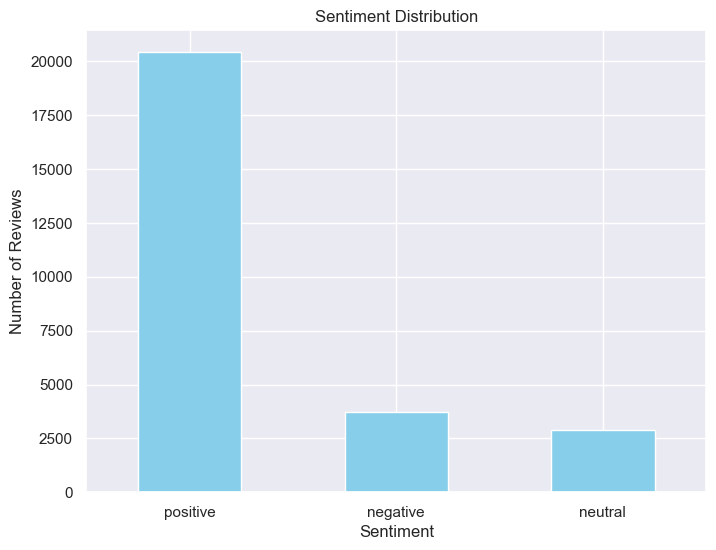

In [22]:
import matplotlib.pyplot as plt

# Sentiment distribution bar chart
sentiment_counts = video_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


- **Positive Reviews** dominate, with significantly more reviews in this category (over 20,000). This suggests a strong leaning toward positivity in the dataset.

- **Negative Reviews** are far fewer, numbering around 3,000. This indicates fewer people expressed negative sentiments.

- **Neutral Reviews** are the least frequent, with around 2,500 reviews. This suggests a smaller portion of reviews are neither strongly positive nor negative.

This class imbalance could have implications for sentiment analysis, such as potential biases in a predictive model if the imbalance isn't addressed. Addressing these imbalances (e.g., via resampling, weighting, or other methods) will be considered before moving to modeling.

#### 2.1.2 Length Analysis

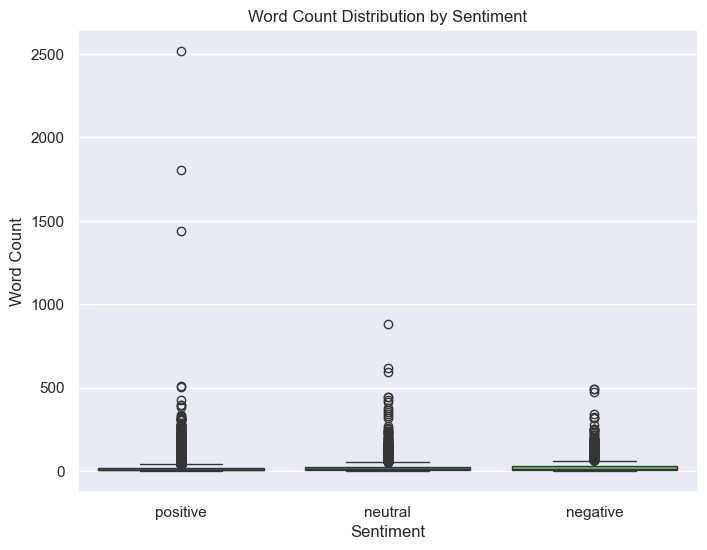

In [23]:
import seaborn as sns

# Add word count column
video_df['word_count'] = video_df['reviews'].apply(lambda x: len(x.split()))

# Box plot for word count distribution by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=video_df, x='sentiment', y='word_count', palette='viridis')
plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()


**Positive Sentiment**
- Wider distribution with reviews ranging from concise to extremely detailed. This reflects that users with positive sentiments often express themselves in more elaborate ways, but there's also variability with shorter feedback included.
- The presence of outliers with higher word counts suggests that some users go into detail when praising the product or content.

**Neutral Sentiment**
 - Neutral reviews exhibit a slightly wider distribution compared to negative reviews, with word counts that fall between concise and moderately descriptive.
- The lack of extreme outliers and the middle-range distribution suggest that users providing neutral feedback often limit themselves to balanced and succinct descriptions.

**Negative Sentiment**
- Most concise reviews, with a narrow distribution and lower median word counts. This suggests that users expressing negative feedback tend to keep their reviews brief and to the point.
- The narrow range implies consistency in word count, as users often convey dissatisfaction in a few impactful words.

#### 2.1.3 Trend Analysis

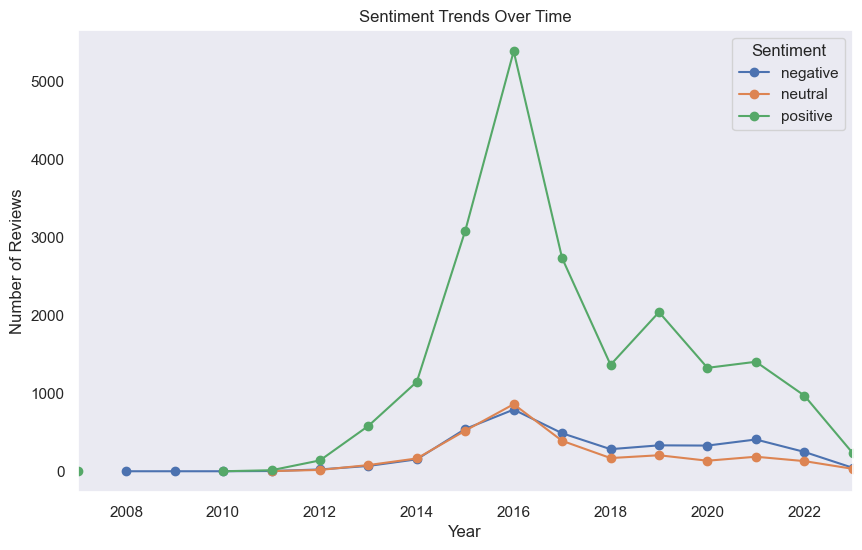

In [24]:
# Convert timestamp to datetime
video_df['timestamp'] = pd.to_datetime(video_df['timestamp'])

# Group by Year and sentiment
time_sentiment = video_df.groupby([video_df['timestamp'].dt.to_period('Y'), 'sentiment']).size().unstack()

# Plot sentiment trends over time
time_sentiment.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid()
plt.show()


**Positive Sentiment (Green Line)**

- Dominates over the entire time period, peaking dramatically around 2016 with over 5,000 reviews. This surge could reflect an event, product, or content that received overwhelming positive attention during that year.
- After 2016, positive reviews show a decline, leveling off around 2,500–3,000 reviews by 2022.

**Negative Sentiment (Blue Line)**

- Remains relatively stable with low counts throughout the years, consistently staying below 1,500 reviews.
- A slight increase can be observed around 2016 and 2018, possibly corresponding to specific content or events that triggered more negative feedback.

**Neutral Sentiment (Orange Line)**

- Similar to negative sentiments, neutral reviews are consistently low, hovering around 1,000 or fewer reviews throughout the years.
- There is a small increase around 2016, though less pronounced than the spike in positive sentiments.

**Overall Patterns**
- The dramatic peak in positive sentiment around 2016 suggests a significant trend or popularity surge. Negative and neutral sentiments, while increasing slightly at the same time, remain far lower.
- After 2016, all sentiments gradually decline, though positive reviews still outnumber the others by a wide margin.

**Possible Next Steps**
- Investigate what happened around 2016 that drove the massive increase in positive reviews.
- Explore factors contributing to the relatively stable presence of negative and neutral sentiments compared to the fluctuating positive trend.



#### 2.1.4 Sentiment Bivariate Analysis

#### 2.1.4.1 Sentiment by Genres (Categories)

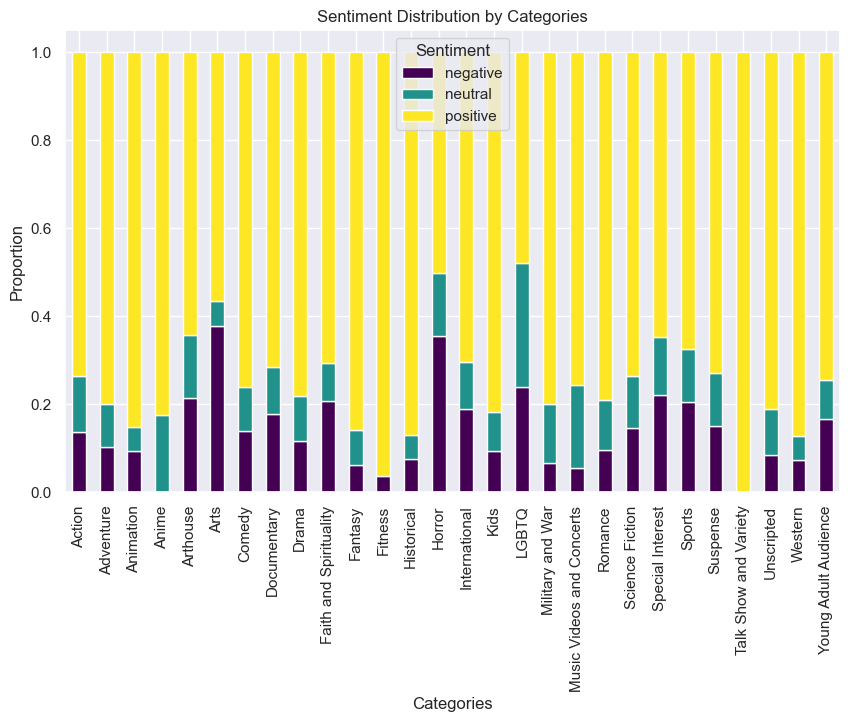

In [25]:
# Cross-tabulation for sentiment and categories
category_sentiment = pd.crosstab(video_df['categories'], video_df['sentiment'], normalize='index')

# Stacked bar chart
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution by Categories')
plt.xlabel('Categories')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()



**Positive Sentiment (Yellow)**

- Categories like Animation, Kids, and Young Adult Audience have the highest proportion of positive sentiments, indicating a generally favorable reception in these genres.
- Action, Adventure, and Suspense also show strong positive sentiment, likely reflecting their appeal to general audiences.

**Neutral Sentiment (Teal)**

- Categories like Documentary, Talk Show and Variety, and Fitness have notable proportions of neutral sentiments. This suggests these genres may elicit more informational or balanced reviews, rather than strong emotional reactions.
- The International and Faith and Spirituality categories also display significant neutral sentiments, likely due to diverse audience perspectives.

**Negative Sentiment (Purple)**

- Categories like Horror, Military and War, and Fitness stand out with higher proportions of negative sentiment. This may indicate dissatisfaction with certain content or unmet expectations.
- Romance and Drama also show moderate negative sentiment, possibly reflecting subjective tastes or polarizing themes.

**Key Insights**
- Audience Preferences: Categories like Animation, Kids, and Adventure are highly favored, while genres such as Horror and Military often elicit critical feedback.
- Balanced Reception: Categories with higher neutral sentiment, such as Documentary and Faith-based content, suggest these genres may attract more nuanced reactions.

Categories with higher negative sentiment could benefit from analyzing specific user feedback to address shortcomings.

#### 2.1.4.1 Sentiment by Price (Paid or Free)

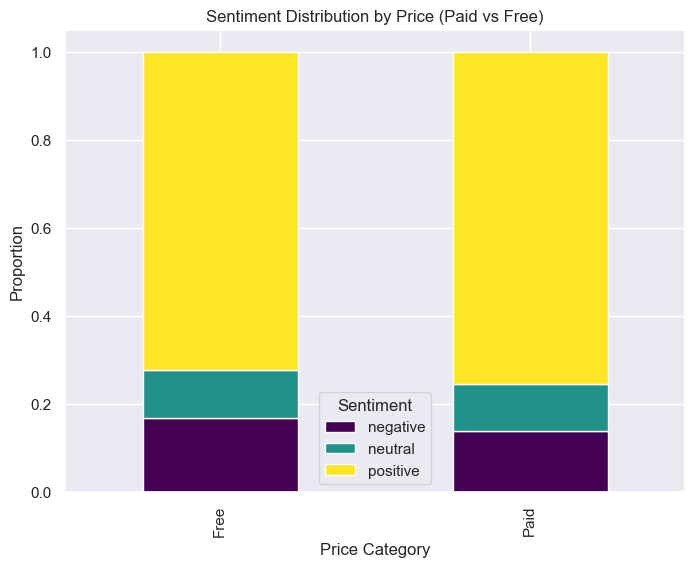

In [26]:
# Create a binary column for paid/free
video_df['is_free'] = video_df['price'].apply(lambda x: 'Free' if x == 0 else 'Paid')

# Cross-tabulation for sentiment and price
price_sentiment = pd.crosstab(video_df['is_free'], video_df['sentiment'], normalize='index')

# Stacked bar chart
price_sentiment.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Sentiment Distribution by Price (Paid vs Free)')
plt.xlabel('Price Category')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()


- Both free and paid content have the highest proportion of positive sentiment, showing that users generally express more favorable opinions, regardless of whether the content was free or paid.

- Positive sentiment slightly dominates more in paid content, which could indicate users finding value in what they’ve paid for.

- Negative sentiment is the least common, but it appears slightly more in free content, possibly reflecting dissatisfaction with expectations when the content is free or of lower quality.

#### 2.1.5 Top 20 Common Words

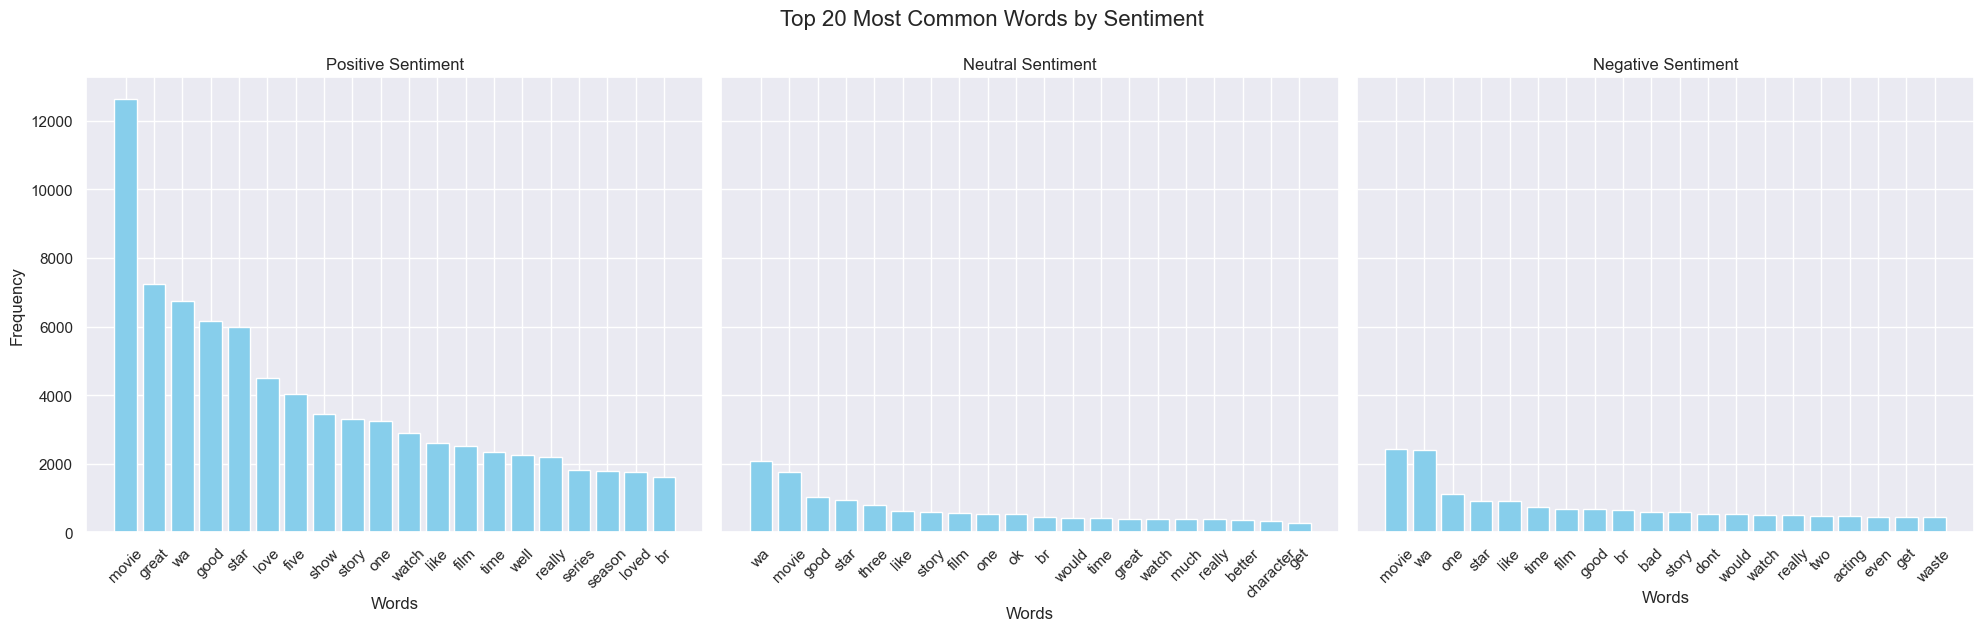

In [27]:
from collections import Counter
import matplotlib.pyplot as plt

# Function to get top common words for a given sentiment
def get_top_words(sentiment):
    sentiment_reviews = ' '.join(video_df[video_df['sentiment'] == sentiment]['reviews']).split()
    return Counter(sentiment_reviews).most_common(20)

# Get common words for each sentiment
positive_words = get_top_words('positive')
neutral_words = get_top_words('neutral')
negative_words = get_top_words('negative')

# Prepare data for plotting
positive_words, positive_counts = zip(*positive_words)
neutral_words, neutral_counts = zip(*neutral_words)
negative_words, negative_counts = zip(*negative_words)

# Create subplots for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot for Positive Sentiment
axes[0].bar(positive_words, positive_counts, color='skyblue')
axes[0].set_title('Positive Sentiment')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Neutral Sentiment
axes[1].bar(neutral_words, neutral_counts, color='skyblue')
axes[1].set_title('Neutral Sentiment')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=45)

# Plot for Negative Sentiment
axes[2].bar(negative_words, negative_counts, color='skyblue')
axes[2].set_title('Negative Sentiment')
axes[2].set_xlabel('Words')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Top 20 Most Common Words by Sentiment', fontsize=16, y=1.05)
plt.show()


**Positive Sentiment** 

- Words like "movie," "great," "good," "love," "show," and "story" dominate.These words convey enthusiasm and strong approval, which aligns with a positive sentiment.
- Words such as "time," "really," "loved," and "well" suggest detailed appreciation or personal connections to the content.
- Words like "series" and "season" might indicate users favorably reviewing TV shows or multi-part content.

Positive sentiment reviews are often more specific, expressing satisfaction, emotional attachment, and appreciation for the quality of the movie or series.

**Neutral Sentiment**
- Words such as "movie," "good," "story," "film," "ok," "much," and "would" are prevalent.
- The word "ok" stands out, reflecting the nature of neutral feedback where users are neither overly impressed nor dissatisfied.
- Words like "better" and "character" indicate neutral feedback may involve constructive criticism, suggesting areas of improvement.
- "Great" appearing alongside "ok" suggests ambivalence in sentiment reviews, where both positive and mediocre tones exist.

Neutral sentiment reviews have mixed descriptions, often balancing praise with critique or indifference.

**Negative Sentiment**
- Words like "movie," "bad," "don't," "waste," "acting," "even," "time," and "get" dominate.
- Negative expressions such as "bad" and "waste" clearly express dissatisfaction.
- Words like "acting" and "even" suggest users criticize specific aspects like performance or the quality of content.
- The word "don't" appearing frequently implies negative reviews often contain direct discouragement or warnings.

Negative sentiment reviews are concise and direct, focusing on dissatisfaction or unmet expectations, with fewer descriptive words compared to positive reviews.

**Overall Insight**
- Words like "movie" and "time" are frequent across all sentiment classes, showing the consistency of these topics regardless of sentiment.
- Positive reviews tend to use descriptive and emotionally charged words, while neutral reviews balance opinion, and negative reviews are focused on direct criticism or dissatisfaction.



#### 2.1.6 Word Clouds

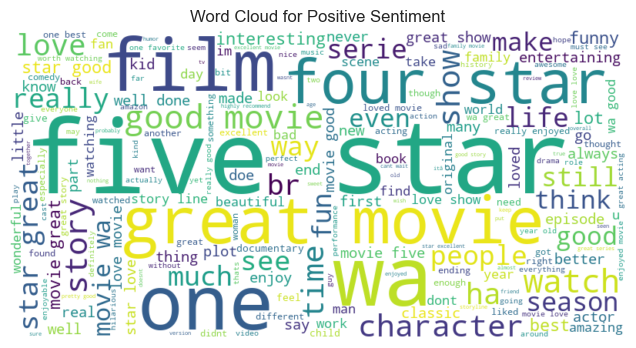

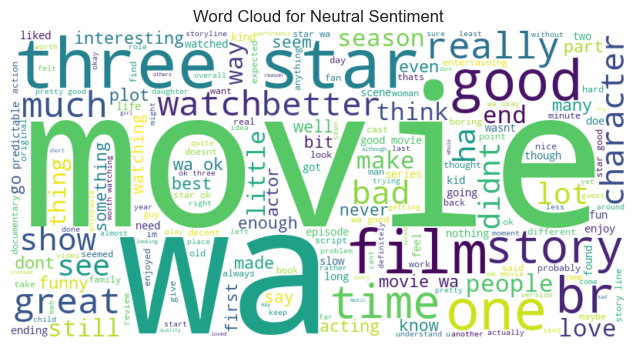

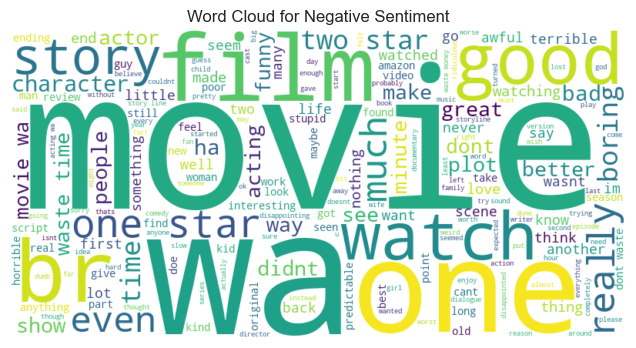

In [28]:
from wordcloud import WordCloud

# Generate word clouds by sentiment
for sentiment in video_df['sentiment'].unique():
    sentiment_text = ' '.join(video_df[video_df['sentiment'] == sentiment]['reviews'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    
    # Plot word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()


- Positive sentiment reviews heavily focus on praising storytelling, character development, and overall emotional engagement. The frequent mention of "great," "love," "good," and "five-star" highlights the satisfaction and excitement users associate with their favorite content.
- Neutral sentiments seem to provide balanced evaluations, often describing technical or storyline aspects of movies or TV shows. The frequent mention of words tied to storytelling ("plot," "character," "story") shows that neutral reviewers are more focused on describing, rather than judging, the content.
- Negative sentiments words like "boring," "waste," "awful," and "bad" reflect a severe level of dissatisfaction and directly convey negative emotion.

### 3.0 Modeling

In this section:

1. We will split the split the dataset into train, validation and test sets.
2. Train 2 hyperparameter tuned baseline models and evaluate the results
3. Use advanced modeling techniqueslike LSTM and BERT Transformations to further improve the modelperformance

#### 3.1 Split the dataset into train, validation and test sets


In [29]:
video_df.head()

,rating,timestamp,movie_title,price,categories,reviews,sentiment,reviews_tokenized,word_count,is_free
0,5,2015-08-24 03:07:17.000,Sneaky Pete,14.570061,Suspense,five star amazon please buy show im hooked,positive,"[five, star, amazon, please, buy, show, im, ho...",8,Paid
1,5,2016-04-19 21:16:50.000,Creative Galaxy,14.570061,Kids,five star kiddos love show,positive,"[five, star, kiddos, love, show]",5,Paid
14,4,2016-09-16 18:39:49.000,Seven Girlfriends,12.990000,Comedy,four star wa pretty good pretty comical scene ...,positive,"[four, star, wa, pretty, good, pretty, comical...",12,Paid
19,3,2016-11-08 22:14:17.000,Still Mine,9.990000,Drama,ok love story bit slow unsatisfying ending,neutral,"[ok, love, story, bit, slow, unsatisfying, end...",7,Paid
21,1,2022-08-22 20:06:25.847,How I Live Now,12.990000,International,trash movie based solely incest storyline garb...,negative,"[trash, movie, based, solely, incest, storylin...",9,Paid
